# About Dataset
A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

### Below are all the features in the dataset:

- Campaign Name: The name of the campaign
- Date: Date of the record
- Spend: Amount spent on the campaign in dollars
- of Impressions: Number of impressions the ad crossed through the campaign
- Reach: The number of unique impressions received in the ad
- of Website Clicks: Number of website clicks received through the ads
- of Searches: Number of users who performed searches on the website
- of View Content: Number of users who viewed content and products on the website
- of Add to Cart: Number of users who added products to the cart
- of Purchase: Number of purchases
### Two campaigns were performed by the company:

- Control Campaign
- Test Campaign

# Import libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read data

In [15]:
control_group = pd.read_csv("resources/control_group.csv", sep = ';')
treatment_group = pd.read_csv("resources/test_group.csv", sep = ";")

In [16]:
control_group.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preparation
- Rename columns and detecting NaN values

In [17]:
control_group.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions",
               "Reach", "Website Clicks", "Number of Searches", "Content Viewed", 
               "Added to Cart", "Number of Purchase"]
treatment_group.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions",
               "Reach", "Website Clicks", "Number of Searches", "Content Viewed", 
               "Added to Cart", "Number of Purchase"]

In [18]:
control_group.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Number of Searches       1
Content Viewed           1
Added to Cart            1
Number of Purchase       1
dtype: int64

In [19]:
treatment_group.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Number of Searches       0
Content Viewed           0
Added to Cart            0
Number of Purchase       0
dtype: int64

In [20]:
control_group.describe()

,Amount Spent,Number of Impressions,Reach,Website Clicks,Number of Searches,Content Viewed,Added to Cart,Number of Purchase
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


# Missing value
- The dataset of the control campaign has missing values in a row. We fill in these missing values by the mean value of each column

In [21]:
control_group.iloc[: , 3:] = control_group.iloc[: , 3:].fillna(value = control_group.iloc[: , 3:].mean())

In [22]:
ab_data = control_group.merge(treatment_group, how = "outer").sort_values("Date");
ab_data.reset_index(drop = True, inplace = True)
ab_data.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_952\2946612874.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = control_group.merge(treatment_group, how = "outer").sort_values("Date");


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Number of Searches,Content Viewed,Added to Cart,Number of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


# Campain name
- Before starting, let's have a look at samples of each group

In [23]:
ab_data["Campaign Name"].value_counts()

Campaign Name
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64

The dataset has only 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

# Best marking strategy 
- Let's look at the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns

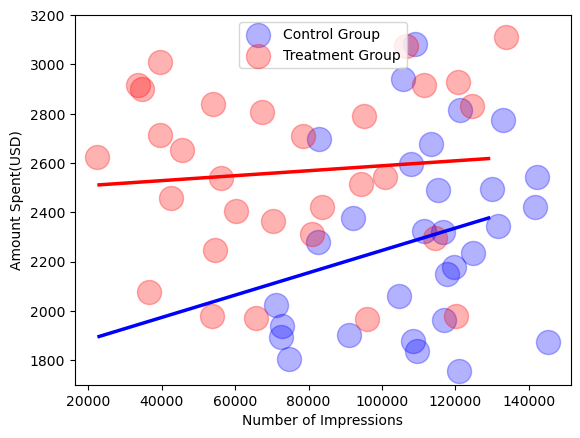

In [24]:
plt.scatter(control_group["Number of Impressions"], control_group["Amount Spent"],
            color = "blue", label = "Control Group", alpha = 0.3, s = 300)
plt.scatter(treatment_group["Number of Impressions"], treatment_group["Amount Spent"],
            color = "red", label = "Treatment Group",  alpha = 0.3, s = 300)
reg_control = linregress(control_group["Number of Impressions"], control_group["Amount Spent"])
reg_treatment = linregress(treatment_group["Number of Impressions"], treatment_group["Amount Spent"])
x = np.arange(23_000, 130_000, 1000)
plt.plot(x,reg_treatment.intercept + reg_treatment.slope*x,
           color = "red", lw = 2.5)
plt.plot(x,reg_control.intercept + reg_control.slope*x,
           color = "blue", lw = 2.5)
plt.ylim(1700, 3200)
plt.ylabel("Amount Spent(USD)")
plt.xlabel("Number of Impressions")
plt.legend(loc = 'upper center')
plt.show()

# Total searches
- The control campaign resulted in more impressions according to the amount spent on both campaigns. Now let’s have a look at the number of searches performed on the website from both campaigns

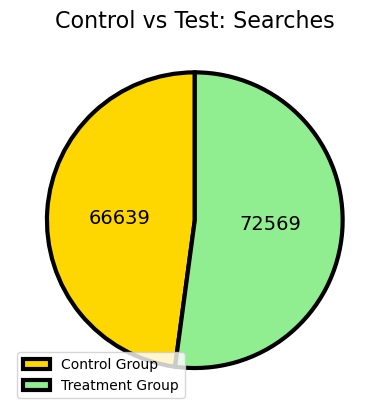

In [25]:
data = [int(control_group["Number of Searches"].sum().round()),
       treatment_group["Number of Searches"].sum()]
plt.pie(data,startangle = 90,labels = data, colors = ['gold','lightgreen'], labeldistance = 0.3,
        textprops={'fontsize': 14}, wedgeprops={"edgecolor":"k",'linewidth': 3})
plt.legend(["Control Group",
       "Treatment Group"], loc = "lower left")
plt.title("Control vs Test: Searches", {'fontsize': 16})
plt.show()

# Website clicks
- The test campaign resulted in more searches on the website. Now let’s have a look at the number of website clicks from both campaigns

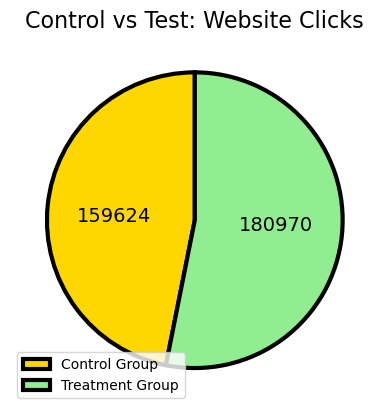

In [26]:
data = [int(control_group["Website Clicks"].sum().round()),
       treatment_group["Website Clicks"].sum()]
plt.pie(data,startangle = 90,labels = data, colors = ['gold','lightgreen'], labeldistance = 0.3,
        textprops={'fontsize': 14}, wedgeprops={"edgecolor":"k",'linewidth': 3})
plt.legend(["Control Group",
       "Treatment Group"], loc = "lower left")
plt.title("Control vs Test: Website Clicks", {'fontsize': 16})
plt.show()

# Content viewed 
- The test campaign wins in the number of website clicks. Now let’s have a look at the amount of content viewed after reaching the website from both campaigns

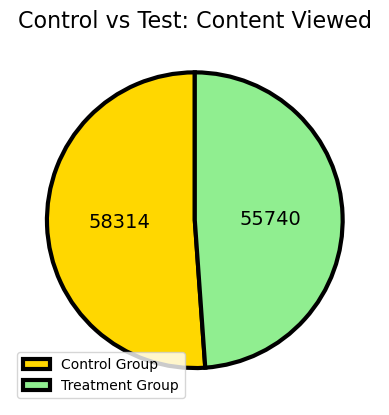

In [27]:
data = [int(control_group["Content Viewed"].sum().round()),
       treatment_group["Content Viewed"].sum()]
plt.pie(data,startangle = 90,labels = data, colors = ['gold','lightgreen'], labeldistance = 0.3,
        textprops={'fontsize': 14}, wedgeprops={"edgecolor":"k",'linewidth': 3})
plt.legend(["Control Group",
       "Treatment Group"], loc = "lower left")
plt.title("Control vs Test: Content Viewed", {'fontsize': 16})
plt.show()

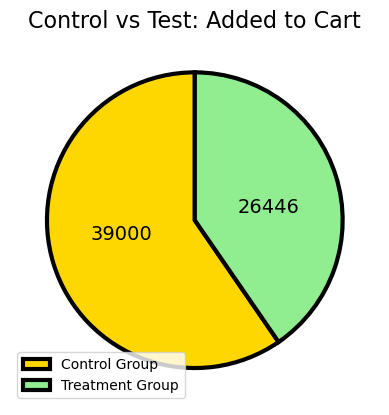

In [28]:
data = [int(control_group["Added to Cart"].sum().round()),
       treatment_group["Added to Cart"].sum()]
plt.pie(data,startangle = 90,labels = data, colors = ['gold','lightgreen'], labeldistance = 0.3,
        textprops={'fontsize': 14}, wedgeprops={"edgecolor":"k",'linewidth': 3})
plt.legend(["Control Group",
       "Treatment Group"], loc = "lower left")
plt.title("Control vs Test: Added to Cart", {'fontsize': 16})
plt.show()

Despite low website clicks more products were added to the cart from the control campaign.

# Convertion to purchase
- Let's calculate the convertion rate

In [29]:
treatment_group["Convertion to Purchase"] = treatment_group["Number of Purchase"]/treatment_group["Website Clicks"]
control_group["Convertion to Purchase"] = control_group["Number of Purchase"]/control_group["Website Clicks"]
control_group.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Number of Searches,Content Viewed,Added to Cart,Number of Purchase,Convertion to Purchase
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000,0.088084
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000,0.063009
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000,0.057160
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000,0.110930
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103,0.098255


# Number of Purchase testing

<function matplotlib.pyplot.show(close=None, block=None)>

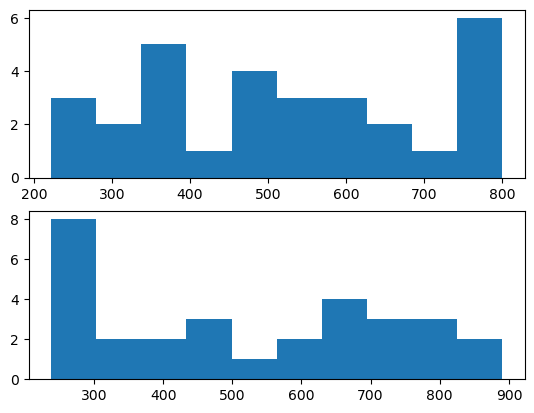

In [30]:
fig, axes = plt.subplots(2,1)
axes[0].hist(control_group["Number of Purchase"], bins = 10)
axes[1].hist(treatment_group["Number of Purchase"], bins = 10)
plt.show

On graph we see that data may not be distributed normaly

# Shapiro–Wilk test
- The Shapiro–Wilk test is a test of normality. As a result it gives value of statistics and p-value

In [31]:
from scipy.stats import shapiro
shapiro(control_group["Number of Purchase"])

ShapiroResult(statistic=0.9432733058929443, pvalue=0.11144547164440155)

In [32]:
shapiro(treatment_group["Convertion to Purchase"])

ShapiroResult(statistic=0.9254688620567322, pvalue=0.037268370389938354)

P-value isn't big enough for treatment group and hypothesis about normality of distribution is rejected

# Mann–Whitney U test
- The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y

In [33]:
from scipy.stats import mannwhitneyu
mannwhitneyu(treatment_group["Convertion to Purchase"], control_group["Convertion to Purchase"])

MannwhitneyuResult(statistic=377.0, pvalue=0.2837780479456242)

In [34]:
mannwhitneyu(treatment_group["Number of Purchase"], control_group["Number of Purchase"])

MannwhitneyuResult(statistic=445.0, pvalue=0.9469515266277105)

The equality of general population is statisticaly significant

# Metrics
Let's calculate basic metrics:
- CTR is the number of clicks that your ad receives divided by the number of times your ad is shown
- CPM is the average cost per mille (1,000) advertising impressions
- CR is the percentage of users who made purchase after clicking on banner

In [37]:
ab_data["CTR"] = ab_data["Website Clicks"]/ab_data["Number of Impressions"]
ab_data["CPM"] = ab_data["Amount Spent"]/ab_data["Number of Impressions"]*1000
ab_data["CR"] = ab_data["Number of Purchase"]/ab_data["Added to Cart"]*100
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Number of Searches,Content Viewed,Added to Cart,Number of Purchase,CTR,CPM,CR
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,27.568862,33.974711
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,0.076814,76.055626,28.523490
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,0.085478,29.351737,64.858491
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0.019358,18.270081,45.058318
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,0.044839,28.935946,62.139535


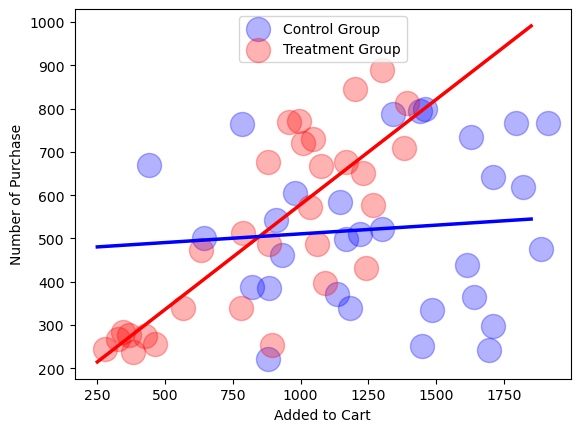

array([ 250,  350,  450,  550,  650,  750,  850,  950, 1050, 1150, 1250,
       1350, 1450, 1550, 1650, 1750, 1850])

In [48]:
plt.scatter(control_group["Added to Cart"], control_group["Number of Purchase"],
            color = "blue", label = "Control Group", alpha = 0.3, s = 300)
plt.scatter(treatment_group["Added to Cart"], treatment_group["Number of Purchase"],
            color = "red", label = "Treatment Group",  alpha = 0.3, s = 300)
reg_control = linregress(control_group["Added to Cart"], control_group["Number of Purchase"])
reg_treatment = linregress(treatment_group["Added to Cart"], treatment_group["Number of Purchase"])
x = np.arange(250, 1851, 100)
plt.plot(x,reg_treatment.intercept + reg_treatment.slope*x,
          color = "red", lw = 2.5)
plt.plot(x,reg_control.intercept + reg_control.slope*x,
       color = "blue", lw = 2.5)
#plt.ylim(1700, 3200)
plt.ylabel("Number of Purchase")
plt.xlabel("Added to Cart")
plt.legend(loc = 'upper center')
plt.show()
x

The control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.

# Metrics testing
- Let's test the difference between metrics in different groups

In [38]:
metrics_to_test = ['CTR', 'CR', 'CPM']

results_list = []

for metric in metrics_to_test:

    t_stat, p_value = mannwhitneyu(ab_data.loc[ab_data['Campaign Name'] == 'Control Campaign', metric],
                                ab_data.loc[ab_data['Campaign Name'] == 'Test Campaign', metric], alternative = 'less')
    
    metric_results = pd.DataFrame({'Metric': [metric],
                                   'T-Statistic': [t_stat],
                                   'P-Value': [p_value]})
    
    results_list.append(metric_results)

t_test_results = pd.concat(results_list, ignore_index=True)

t_test_results

,Metric,T-Statistic,P-Value
0,CTR,199.0,1.063232e-04
1,CR,188.0,5.528863e-05
2,CPM,115.0,3.799573e-07


The equality of CR, CTR and CPM is statisticaly insignificant.

# Conclusion

From the above A/B tests, we found that the control campaign resulted in more sales and engagement from the visitors. The products were viewed approximately the same from the control and test campaign, but in control group products in the cart and sales metrics were higher. Although the conversation rate of products in the cart is higher in the test campaign. The test campaign resulted in more sales according to the products viewed and added to the cart. And the control campaign results in more sales overall. So, the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.